# **IMDb Movie Sentiment Analysis**

**Dataset :**
https://drive.google.com/file/d/1BHGTMDhIZzYIicghCohoQs1I1DlGHZSO/view?usp=sharing

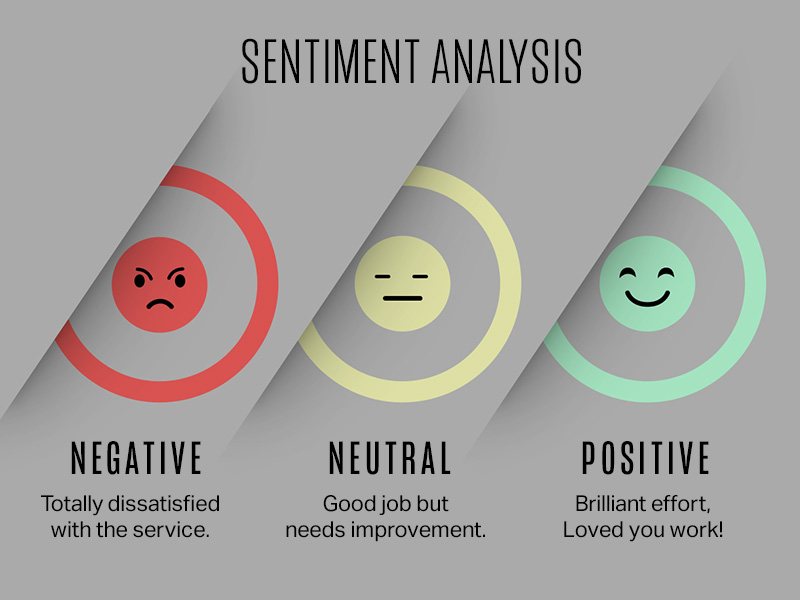

#### **Objective:**

The objective of this notebook is to determine the sentiment (positive or negative) associated with movie reviews from the IMDb database.

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/MyDrive')

In [4]:
pip install keras

In [5]:
pip install keras_preprocessing

In [6]:
import pandas as pd
import numpy as np

import string
import re

import keras
from keras.datasets import imdb
from keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

**Reading the data**

In [7]:
data = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv')

data['review'] = data['review'].str.lower()

data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


**Removing the stopwords and tags**

In [8]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because",
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here",
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should",
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]

In [9]:
def remove_stopwords(data):
  data['review without stopwords'] = data['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result


In [10]:
data_without_stopwords = remove_stopwords(data)
data_without_stopwords['clean_review']= data_without_stopwords['review without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')

<ipython-input-10-ba7948d4afde>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')


In [11]:
data_without_stopwords.head()

,review,sentiment,review without stopwords,clean_review
0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching just 1 oz epi...,one reviewers mentioned watching just 1 oz epi...
1,a wonderful little production. <br /><br />the...,positive,wonderful little production. <br /><br />the f...,wonderful little production the filming techn...
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,basically family little boy (jake) thinks zomb...,basically family little boy jake thinks zomb...
4,"petter mattei's ""love in the time of money"" is...",positive,"petter mattei's ""love time money"" visually stu...",petter mattei s love time money visually stu...


In [12]:
reviews = data_without_stopwords['clean_review']
reviews

0        one reviewers mentioned watching just 1 oz epi...
1        wonderful little production  the filming techn...
2        thought wonderful way spend time hot summer we...
3        basically family little boy  jake  thinks zomb...
4        petter mattei s  love time money  visually stu...
                               ...                        
49995    thought movie right good job  wasn t creative ...
49996    bad plot  bad dialogue  bad acting  idiotic di...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    no one expects star trek movies high art  fans...
Name: clean_review, Length: 50000, dtype: object

In [13]:
reviews_list = []
for i in range(len(reviews)):
  reviews_list.append(reviews[i])

In [14]:
sentiment = data_without_stopwords['sentiment']

In [15]:
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, sentiment)))
y

array([1, 1, 1, ..., 0, 0, 0])

**Train Test Split**

In [16]:
X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, y, test_size=0.2, random_state = 45)

In [17]:
X_train

['saw film birmingham southern college 1975  shown combination red balloon  films similar dream like quality  bulk film entails fish swimming happily bowl new owner  little boy  away school  cat enters room fish bowl are  begins warily stalk  prey   boy begins walk home school  viewer wonders whether will arrive time save fish friend  fish becomes agitated cat s presence  finally jumps bowl  cat quickly walks fish  gently picks paws  returns bowl  boy returns happily fish  none wiser the ending amazing irony technical complexity  hard imagine director could ve pulled technical feat back 1959    seems trick 2003 if can find it  watch    won t disappointed   do  find it  let know can get copy  too ',
 'film s first shot   keira knightley elizabeth bennet wandering reading field dawn  thus invoking clichés cinema developed address phenomenon strong minded rebellious female character period drama   knew something make want kill myself joe wright seemed not not read book  regrettable misapp

In [18]:
Y_train

array([1, 0, 0, ..., 1, 0, 0])

In [19]:
len(Y_train)

40000

**Tokenization**

In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [21]:
words_to_index = tokenizer.word_index

In [22]:
len(words_to_index)

95419

**Applying read glove vector**

In [23]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

In [24]:
word_to_vec_map = read_glove_vector('/content/drive/My Drive/glove.6B.50d.txt')

In [25]:
maxLen = 150

In [26]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)

**Applying LSTM**

In [27]:
def imdb_rating(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.6)(X)

  X = LSTM(128)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [28]:
model = imdb_rating((maxLen,))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           4770950   
                                                                 
 lstm (LSTM)                 (None, 150, 128)          91648     
                                                                 
 dropout (Dropout)           (None, 150, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584

**Applying CNN**

In [29]:
def conv1d_model(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Conv1D(512,3,activation='relu')(embeddings)

  X = MaxPooling1D(3)(X)

  X = Conv1D(256,3,activation='relu')(X)

  X = MaxPooling1D(3)(X)

  X = Conv1D(256,3,activation='relu')(X)
  X = Dropout(0.8)(X)
  X = MaxPooling1D(3)(X)

  X = GlobalMaxPooling1D()(X)

  X = Dense(256, activation='relu')(X)
  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [30]:
model_1d = conv1d_model((maxLen,))
model_1d.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           4770950   
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          77312     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 256)          0         
 1D)                                                       

In [31]:
X_train_indices = tokenizer.texts_to_sequences(X_train)

In [32]:
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(40000, 150)

**CNN Model - Train data**

In [33]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)

In [34]:
model_1d.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model_1d.fit(X_train_indices, Y_train, batch_size=64, epochs=1)

625/625 [==============================] - 8s 8ms/step - loss: 0.5665 - accuracy: 0.6975


Here, we get 70.63% accuracy

---



**LSTM Model - Train data**

In [35]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train_indices, Y_train, batch_size=64, epochs=1)

625/625 [==============================] - 17s 21ms/step - loss: 0.5767 - accuracy: 0.6955


Here, we get 68.54% accuracy

---

**LSTM Model - Test data**

In [37]:
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

In [38]:
model.evaluate(X_test_indices, Y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.4977 - accuracy: 0.7604


[0.49774789810180664, 0.7603999972343445]

Here, we get 75.43% accuracy

---

**CNN Model - Test data**

In [39]:
model_1d.evaluate(X_test_indices, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5784 - accuracy: 0.7325


[0.5783682465553284, 0.7325000166893005]

Here, we get 75.21% accuracy

---

In [40]:
preds = model_1d.predict(X_test_indices)

313/313 [==============================] - 1s 2ms/step


In [41]:
n = np.random.randint(0,9999)

X_test[n]

'first heard movie  mildly interested  plot seemed like opportunity hilarity bam margera actor director seemed like something might good  found movie starred ryan dunn  even interested  i fan homewrecker on    yeah  lame   however  didn t much faith good  sat watch it  afraid wasting time but even just five minutes became apparent wrong i thought comedy film delightfully idiotic  definitely not suited kinds people  acting rather good  much better expectations  thought rather easy relate ryan s character  gave movie center believable  key movie outrageous  and probably not fan borat  the movie not suitable younger people  duh  will definitely create fair share awkward turtles watched parents  good one buddies movie night '

In [42]:
if preds[n] > 0.5:
  print('predicted sentiment : positive')
else:
  print('precicted sentiment : negative')

if (Y_test[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

predicted sentiment : positive
correct sentiment : positive


In [43]:
preds[n]

array([0.5189007], dtype=float32)

In [44]:
Y_test[n]

1

In [45]:
model_1d.save_weights('/content/drive/My Drive/imdb_weights_con1vd.hdf5')

In [46]:
reviews_list_idx = tokenizer.texts_to_sequences(reviews_list)

In [47]:
def add_score_predictions(data, reviews_list_idx):

  data['sentiment score'] = 0

  reviews_list_idx = pad_sequences(reviews_list_idx, maxlen=maxLen, padding='post')

  review_preds = model.predict(reviews_list_idx)

  data['sentiment score'] = review_preds

  pred_sentiment = np.array(list(map(lambda x : 'positive' if x > 0.5 else 'negative',review_preds)))

  data['predicted sentiment'] = 0

  data['predicted sentiment'] = pred_sentiment

  return data

In [48]:
data = add_score_predictions(data, reviews_list_idx)

1563/1563 [==============================] - 13s 8ms/step


In [49]:
data[['sentiment','predicted sentiment']]

,sentiment,predicted sentiment
0,positive,negative
1,positive,positive
2,positive,positive
3,negative,negative
4,positive,positive
...,...,...
49995,positive,negative
49996,negative,negative
49997,negative,positive
49998,negative,positive
